In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py
from IPython.utils import io

In [2]:
%matplotlib widget

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [5]:
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import GravityFramework
from likelihood_calculator import auxiliary_functions as aux
gfw = GravityFramework.GravityFramework()

In [7]:
charges = 1
force = charges * 1.6e-19 * 20 / 8.6e-3 * 0.63
print(1e-17/force/np.sqrt(7*24*60*60))

5.485320807184154e-05


### 5 um bead

1) check bead's type

2) check z seperation from Alex

3) validate electrodes dimensonality

4) Beam profile result is X: 393.17, Y: 429.43


In [13]:
# 5um
bdf_discharge = load_dir(dirname='/data/new_trap/20200226/Bead1/Discharge/', 
                         start_file=0, max_file=1000)

No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data


In [21]:
m1 = gfw.build_z_response(bdf_discharge, drive_freq=71, charges=1, bandwidth=1, bimodal=False)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
Z2-amplitude:  1.52e+01
reduced chi2:  68539.27725277281
***************************************************
Z2-amplitude:  4.49e+01
reduced chi2:  32259.41991859764
***************************************************
Z2-amplitude:  1.00e+05
reduced chi2:  364407560.5714335
***************************************************
Z2-amplitude:  1.00e+05
reduced chi2:  350023752.0936372
***************************************************
Z2-amplitude:  1.00e+05
reduced chi2:  293316247.3225827
***************************************************
Z2-amplitude:  1.00e+05
reduced chi2:  244208420.7832561
***************************************************
Z2-amplitude:  1.00e+05
reduced chi2:  203829398.3574873
***************************************************
Z2-amplitude:  1.00e+05
reduced chi2:  146219061.8155891
***************************************************
Z2-amplitude:  1.00e+05
reduced chi2:  104456698.55029035
******************

***************************************************
Z2-amplitude:  4.87e+00
reduced chi2:  1084.9081834765911
***************************************************
Z2-amplitude:  5.33e+00
reduced chi2:  1599.1801372319778
***************************************************
Z2-amplitude:  7.21e+00
reduced chi2:  865.960060503475
***************************************************
Z2-amplitude:  2.70e+00
reduced chi2:  981.4590297458507
***************************************************
Z2-amplitude:  8.95e+00
reduced chi2:  1121.5508293650514
Z2 response (amplitude): 27922.484128632783


In [22]:
amps = np.array([m_.values[0] for m_ in m1])
# amps32 = np.array([m_.values[1] for m_ in m1])
# phases = [m_.values[2] for m_ in m1]
# phases32 = [m_.values[4] for m_ in m1]

<IPython.core.display.Javascript object>


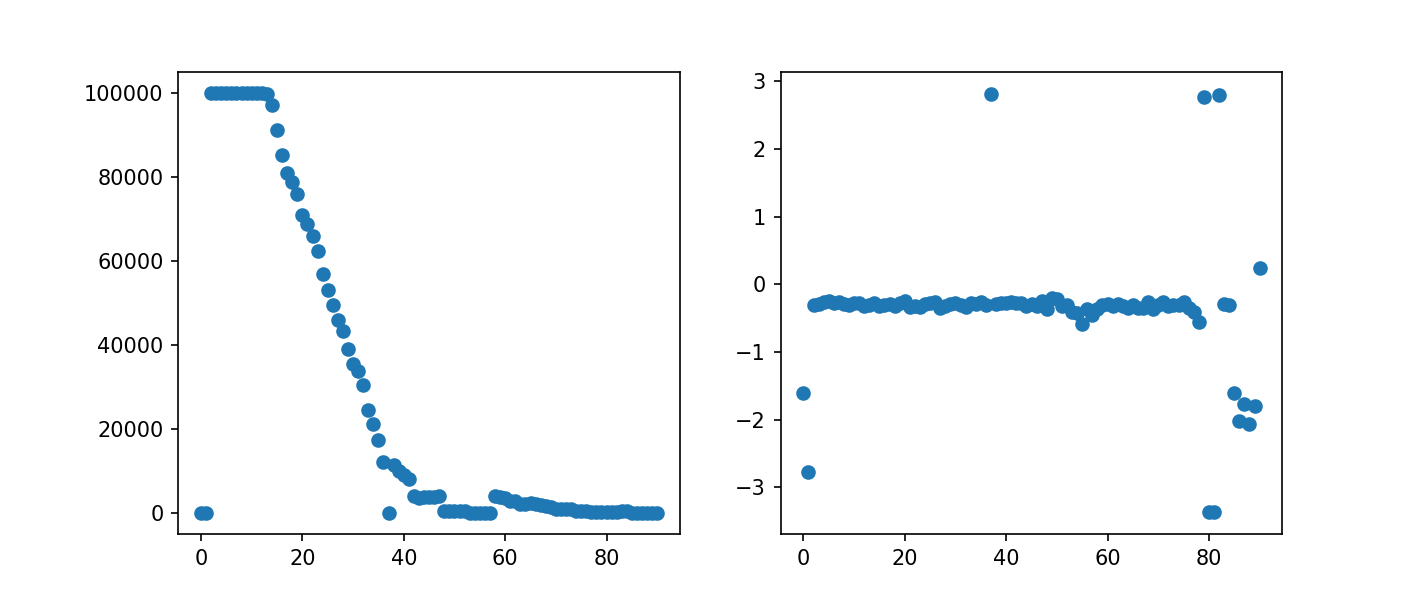

In [18]:
_, ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].scatter(range(len(amps)), amps)
ax[1].scatter(range(len(amps)), phases)

In [11]:
arrrange =  np.arange(100, 500 ,0.1)
residuals = [np.mean((amps/scale_)%1) for scale_ in arrrange]
scale = arrrange[np.argmin(residuals)]
print(scale)

432.8999999999811


<IPython.core.display.Javascript object>


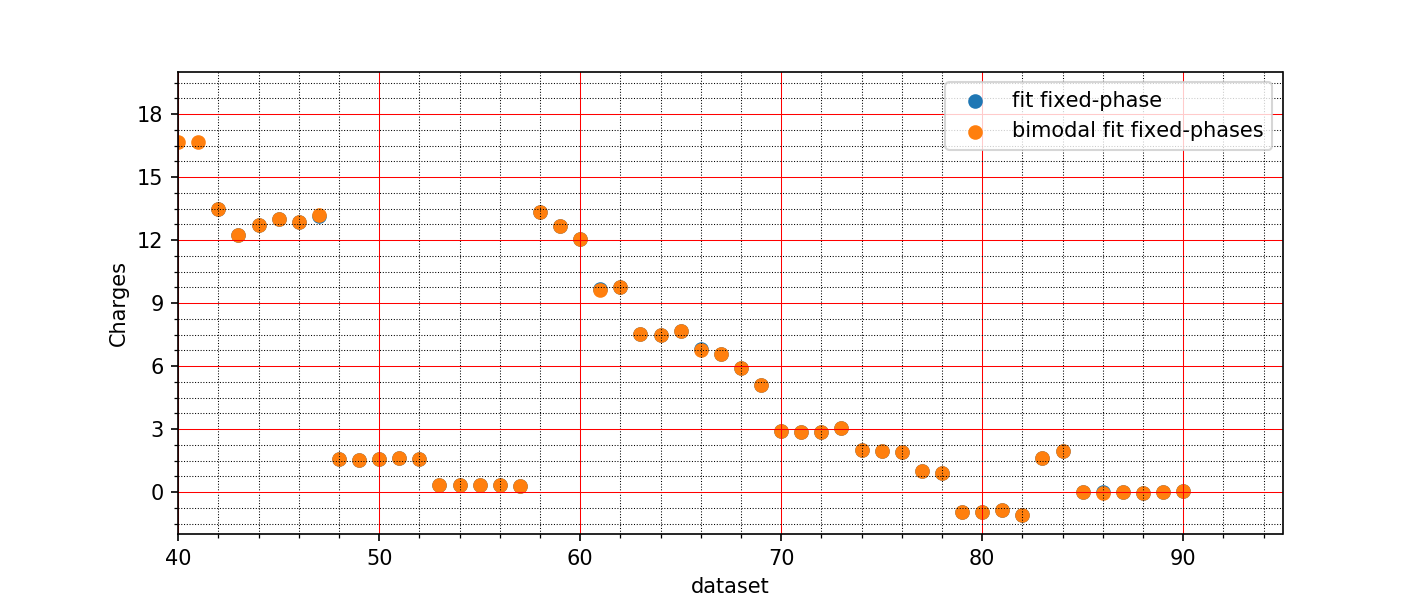

In [33]:
_,ax = plt.subplots(figsize=(9.5,4))
scale = 300

# Perrinf
ax.scatter(range(len(amps)), amps/scale, label='fit fixed-phase')
ax.scatter(range(len(amps)), amps1/scale, label='bimodal fit fixed-phases')

ax.legend()
ax.set(xlabel='dataset', ylabel='Charges', ylim=(-2,20), xlim=(40,None))
ax.grid(axis='y')
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [14]:
bdf_z = bdf_discharge[44:48]
bdf_x = bdf_discharge[48:53]
bdf_y = bdf_discharge[53:58]

freq = bdf_z[0].psd2('z')[0]
z_scale1 = bdf_z[0].psd2('z')[1][freq==71]
for bb in bdf_z:
    z_scale1 += bb.psd2('z')[1][freq==71]
z_scale1 /= len(bdf_z)

x_scale1 = bdf_x[0].psd2('x')[1][freq==71]
for bb in bdf_x:
    x_scale1 += bb.psd2('x')[1][freq==71]
x_scale1 /= len(bdf_x)

y_scale1 = bdf_y[0].psd2('y')[1][freq==71]
for bb in bdf_y:
    y_scale1 += bb.psd2('y')[1][freq==71]
y_scale1 /= len(bdf_y)

charges = 13
force = charges * 1.6e-19 * 20 / 8.6e-3 * 0.63 * np.sqrt(10) # in Newtons/sqrt(Hz)
z_scale1 = force/np.sqrt(z_scale1)
x_scale1 = force/np.sqrt(x_scale1)
y_scale1 = force/np.sqrt(y_scale1)

In [9]:
## 100 files of shaking data for nose floor
data_bdfs = load_dir(dirname='/data/new_trap/20200226/Bead1/Shaking/Shaking385/', 
                         file_prefix='Shaking0', start_file=0, max_file=1000)
freq = data_bdfs[0].psd2('x')[0]
fftx1 = data_bdfs[0].psd2('x')[1]
ffty1 = data_bdfs[0].psd2('y')[1]

fftz1 = data_bdfs[0].psd2('z')[1]
for i in range(1,500):
    fftx1 += data_bdfs[i].psd2('x')[1]
    fftz1 += data_bdfs[i].psd2('z')[1]
    ffty1 += data_bdfs[i].psd2('y')[1]
fftx1/=500
ffty1/=500
fftz1/=500

No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data


No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data


No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data


In [85]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
# tf_freq = np.interp(freq, gfw.tf_freq, gfw.tf_ffts[2])
ax[0].semilogy(freq, np.sqrt(fftx1)*x_scale)
ax[1].semilogy(freq, np.sqrt(fftz1)*z_scale)
ax[0].set(xlim=(1,70), ylim=(9e-18,1e-14), xlabel='Frequency [Hz.]', ylabel=r'ASD [N/$\sqrt{Hz}$]', title='X force')
_ = ax[1].set(xlim=(1,70), ylim=(9e-18,1e-14), xlabel='Frequency [Hz.]', title=r'Z force')
print(np.sqrt(fftx1[freq==18])*x_scale/np.sqrt(10), np.sqrt(fftz1[freq==18])*z_scale/np.sqrt(10))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

NameError: name 'fftx1' is not defined

In [233]:
bb = load_dir(dirname='/data/new_trap/20200226/Bead1/Shaking/Shaking385/', 
                         file_prefix='Shaking0', start_file=0, max_file=1)[0]
from likelihood_calculator import auxiliary_functions as aux
cant_pos_x = np.mean(bb.cant_pos[0]) 
x_focous = 393.17
print('distance: ', x_focous-aux.voltage_to_position(cant_pos_x)-4.8/2+1)

No laser power data
1000  files in folder
1  files loaded
distance:  6.16578790887454


### 20200306 bead

In [6]:
bdf_discharge = load_dir(dirname='/data/new_trap/20200306/Bead1/Discharge/', 
                         start_file=0, max_file=1000)

No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data


In [7]:
m1 = gfw.build_z_response(bdf_discharge, drive_freq=71, charges=1, bandwidth=1, decimate=10, bimodal=False)

***************************************************
Z2-amplitude:  3.63e+03
reduced chi2:  4744902213.760545
***************************************************
Z2-amplitude:  6.33e+03
reduced chi2:  18360459.72347879
***************************************************
Z2-amplitude:  6.99e+03
reduced chi2:  19037973.33693321
***************************************************
Z2-amplitude:  6.19e+02
reduced chi2:  171479.20586837822
***************************************************
Z2-amplitude:  5.91e+02
reduced chi2:  143705.81208716513
***************************************************
Z2-amplitude:  6.63e+03
reduced chi2:  23609686.99723179


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
Z2-amplitude:  8.95e+03
reduced chi2:  42531078.65778293
***************************************************
Z2-amplitude:  7.43e+03
reduced chi2:  22787928.495606765
***************************************************
Z2-amplitude:  6.30e+03
reduced chi2:  15432033.522964183
***************************************************
Z2-amplitude:  4.78e+03
reduced chi2:  10300470.912370771
***************************************************
Z2-amplitude:  3.71e+03
reduced chi2:  5199696.237537039
***************************************************
Z2-amplitude:  2.55e+03
reduced chi2:  2840373.0475729033
***************************************************
Z2-amplitude:  1.54e+03
reduced chi2:  1082741.9305387156
***************************************************
Z2-amplitude:  8.66e+02
reduced chi2:  268760.2919798061
***************************************************
Z2-amplitude:  3.11e+01
reduced chi2:  1439.050464283974
**************

reduced chi2:  58497478.820648365
***************************************************
Z2-amplitude:  1.00e+04
reduced chi2:  40590256.89815634
***************************************************
Z2-amplitude:  1.01e+04
reduced chi2:  38329718.273754835
***************************************************
Z2-amplitude:  1.01e+04
reduced chi2:  35256376.80848901
***************************************************
Z2-amplitude:  9.54e+03
reduced chi2:  38477141.95829832
***************************************************
Z2-amplitude:  9.96e+03
reduced chi2:  38456000.614245296
***************************************************
Z2-amplitude:  1.05e+04
reduced chi2:  43972917.237956755
***************************************************
Z2-amplitude:  8.70e+02
reduced chi2:  346115.09043833637
***************************************************
Z2-amplitude:  8.48e+02
reduced chi2:  214110.97140878972
***************************************************
Z2-amplitude:  6.50e+02
reduced chi2:

***************************************************
Z2-amplitude:  1.08e+04
reduced chi2:  46821735.5035174
***************************************************
Z2-amplitude:  1.08e+04
reduced chi2:  43711816.360415205
***************************************************
Z2-amplitude:  1.01e+04
reduced chi2:  48326603.983346075
***************************************************
Z2-amplitude:  1.09e+04
reduced chi2:  42325352.051023096
***************************************************
Z2-amplitude:  1.04e+04
reduced chi2:  40502879.579699524
***************************************************
Z2-amplitude:  1.01e+04
reduced chi2:  53152376.76948446
***************************************************
Z2-amplitude:  1.04e+04
reduced chi2:  48533312.50376581
***************************************************
Z2-amplitude:  1.04e+04
reduced chi2:  43899619.15696485
***************************************************
Z2-amplitude:  1.01e+04
reduced chi2:  43120894.74032483
****************

***************************************************
Z2-amplitude:  9.80e+03
reduced chi2:  36146463.03770611
***************************************************
Z2-amplitude:  9.62e+03
reduced chi2:  32665779.491351586
***************************************************
Z2-amplitude:  9.62e+03
reduced chi2:  40205722.197949685
***************************************************
Z2-amplitude:  9.34e+03
reduced chi2:  36123938.90478143
***************************************************
Z2-amplitude:  1.01e+04
reduced chi2:  50638014.69952527
***************************************************
Z2-amplitude:  1.00e+04
reduced chi2:  50816493.5588251
***************************************************
Z2-amplitude:  9.76e+03
reduced chi2:  43945833.37266832
***************************************************
Z2-amplitude:  9.44e+03
reduced chi2:  50384256.40936746
***************************************************
Z2-amplitude:  1.01e+04
reduced chi2:  48633958.99494591
******************

***************************************************
Z2-amplitude:  9.06e+02
reduced chi2:  380054.7664484589
***************************************************
Z2-amplitude:  6.99e+01
reduced chi2:  3341.1344986544223
***************************************************
Z2-amplitude:  9.15e+01
reduced chi2:  2028.355853931453
***************************************************
Z2-amplitude:  8.91e+01
reduced chi2:  3623.7387023018473
***************************************************
Z2-amplitude:  6.05e+01
reduced chi2:  2004.9993089681311
***************************************************
Z2-amplitude:  6.01e+01
reduced chi2:  3033.2423914289207
***************************************************
Z2-amplitude:  8.38e+01
reduced chi2:  3599.627026441686
***************************************************
Z2-amplitude:  8.08e+01
reduced chi2:  4111.992122336815
***************************************************
Z2-amplitude:  7.62e+01
reduced chi2:  4073.863415738047
***************

In [78]:
amps2 = np.array([m_.values[0] for m_ in m1])
# phases2 = np.array([m_.values[2] for m_ in m1])

<IPython.core.display.Javascript object>


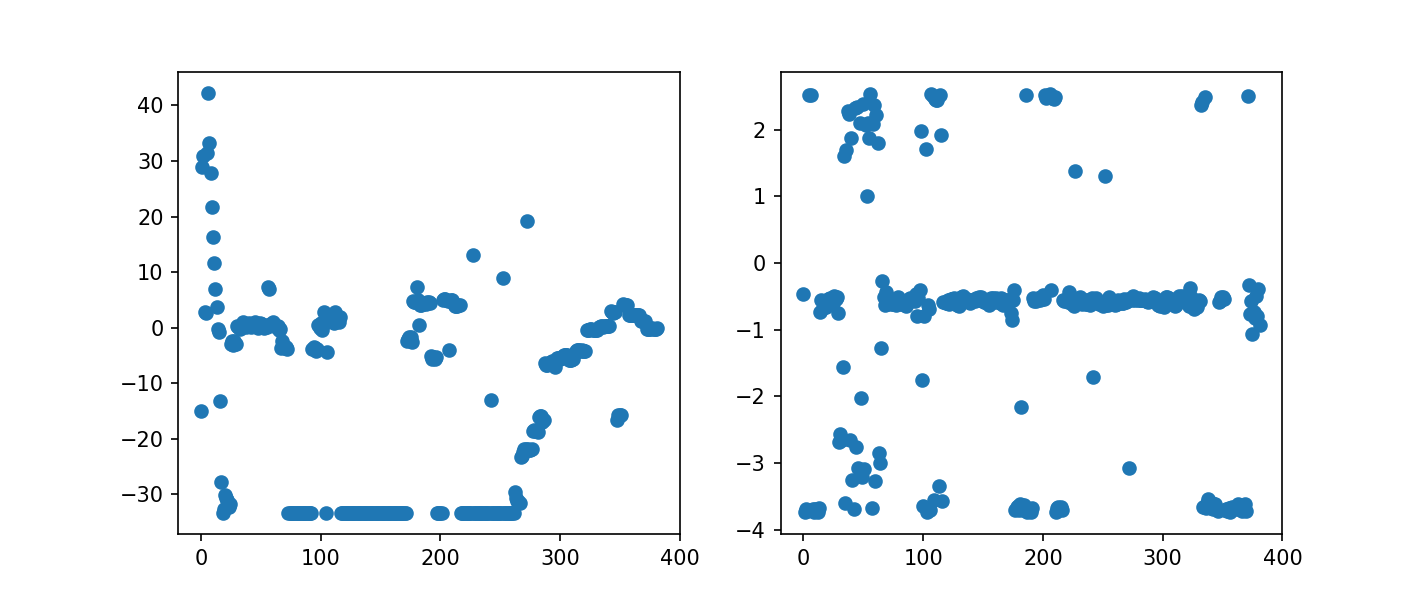

In [92]:
_, ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].scatter(range(len(amps2)), amps2/300)
ax[1].scatter(range(len(amps2)), phases2)

<IPython.core.display.Javascript object>


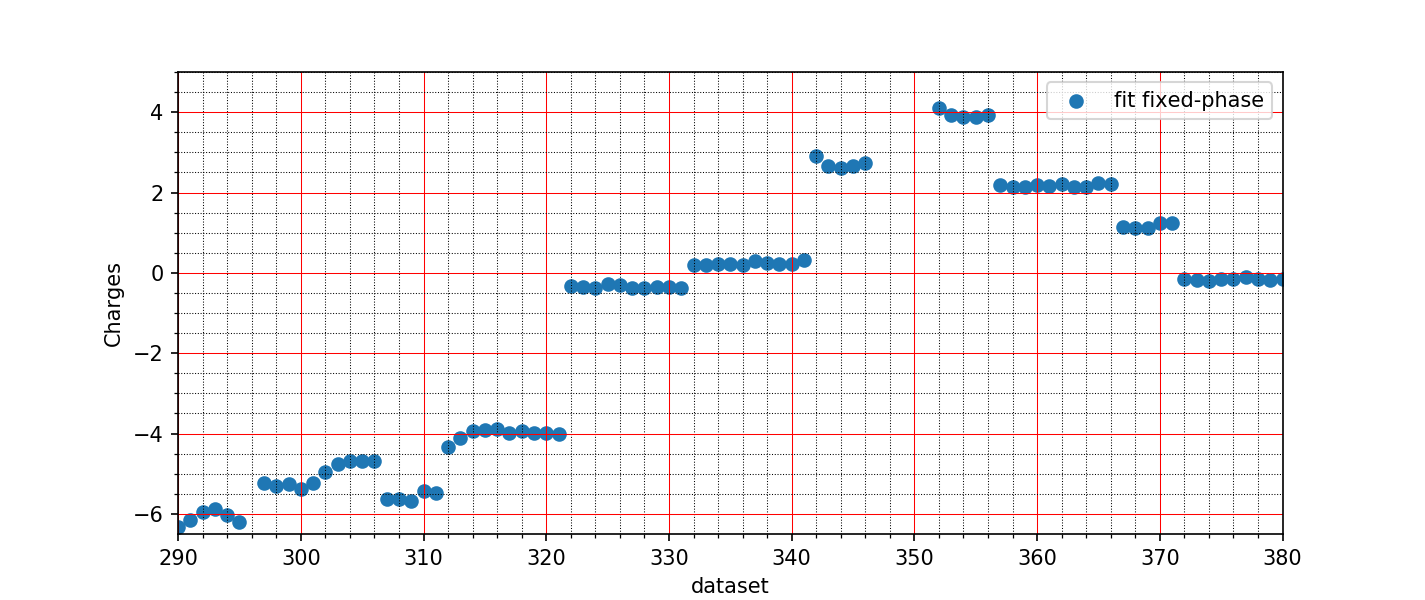

In [257]:
_,ax = plt.subplots(figsize=(9.5,4))
scale = 310

# Perrinf
ax.scatter(range(len(amps2)), amps2/scale, label='fit fixed-phase')
# ax.scatter(range(len(amps2)), amps2/scale, label='bimodal fit fixed-phases')

ax.legend()
ax.set(xlabel='dataset', ylabel='Charges', ylim=(-6.5,5), xlim=(290,380))
ax.grid(axis='y')
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [153]:
bdf_z = bdf_discharge[311:322]

freq = bdf_z[0].psd2('z')[0]
z_scale = bdf_z[0].psd2('z')[1][freq==71]
for bb in bdf_z:
    z_scale += bb.psd2('z')[1][freq==71]
z_scale /= len(bdf_z)

charges = 4
force = charges * 1.6e-19 * 20 / 8.6e-3 * 0.63 * np.sqrt(10) # in Newtons/sqrt(Hz)
z_scale = force/np.sqrt(z_scale)

In [157]:
## 100 files of shaking data for nose floor
# data_bdfs = load_dir(dirname='/data/new_trap/20200306/Bead1/Shaking/Shaking370/', 
#                          file_prefix='Shaking0', start_file=0, max_file=1000)
freq = data_bdfs[0].psd2('x')[0]
fftz1 = data_bdfs[0].psd2('z')[1]
for i in range(1,500):
    fftz1 += data_bdfs[i].psd2('z')[1]
fftz1/=500

In [159]:
np.std(data_bdfs[0].cant_pos[1] * 50) * np.sqrt(2) * 2  # stroke in y in micrometers

201.10605178111865

<IPython.core.display.Javascript object>


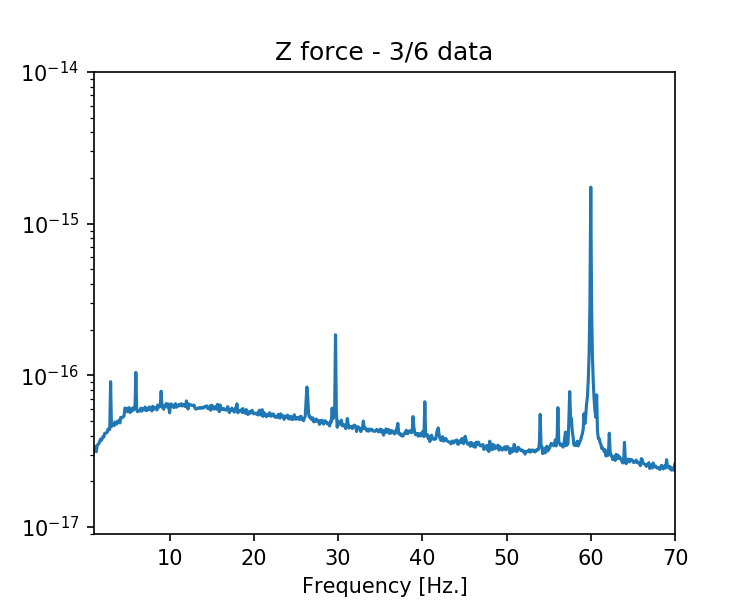

[1.70191031e-16] [1.39024505e-17]


In [160]:
_,ax = plt.subplots(figsize=(5,4))
# tf_freq = np.interp(freq, gfw.tf_freq, gfw.tf_ffts[2])
ax.semilogy(freq, np.sqrt(fftz1)*z_scale)
_ = ax.set(xlim=(1,70), ylim=(9e-18,1e-14), xlabel='Frequency [Hz.]', title=r'Z force - 3/6 data')
print(np.sqrt(fftx1[freq==36])*x_scale/np.sqrt(10), np.sqrt(fftz1[freq==36])*z_scale/np.sqrt(10))

### 3/16/2020

In [161]:
bdf_discharge = load_dir(dirname='/data/new_trap/20200316/Bead1/Discharge/', 
                         start_file=0, max_file=1000)

No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data


No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data


In [162]:
fname = r'/data/new_trap/20200316/Bead1/TransFunc/TransFunc_Z_m950k_afterspin2_long150s.h5'
tf_z = BeadDataFile.BeadDataFile(fname=fname)
tf_list = [tf_z]

No height data
No cantilever data
Error loading spinning data
No laser power data


In [190]:
bdf_z = bdf_discharge[640:650]

freq = bdf_z[0].psd2('z')[0]
z_scale = bdf_z[0].psd2('z')[1][freq==71]
for bb in bdf_z:
    z_scale += bb.psd2('z')[1][freq==71]
z_scale /= len(bdf_z)

charges = 7
force = charges * 1.6e-19 * 20 / 8.6e-3 * 0.63 * np.sqrt(10) # in Newtons/sqrt(Hz)
z_scale = force/np.sqrt(z_scale)

In [198]:
## 100 files of shaking data for nose floor
data_bdfs = load_dir(dirname='/data/new_trap/20200316/Bead1/Shaking/Shaking368/', 
                         file_prefix='Shaking0', start_file=0, max_file=200)
freq = data_bdfs[0].psd2('x')[0]
fftz1 = data_bdfs[0].psd2('z')[1]
for i in range(1,100):
    fftz1 += data_bdfs[i].psd2('z')[1]
fftz1/=100

No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data


<IPython.core.display.Javascript object>


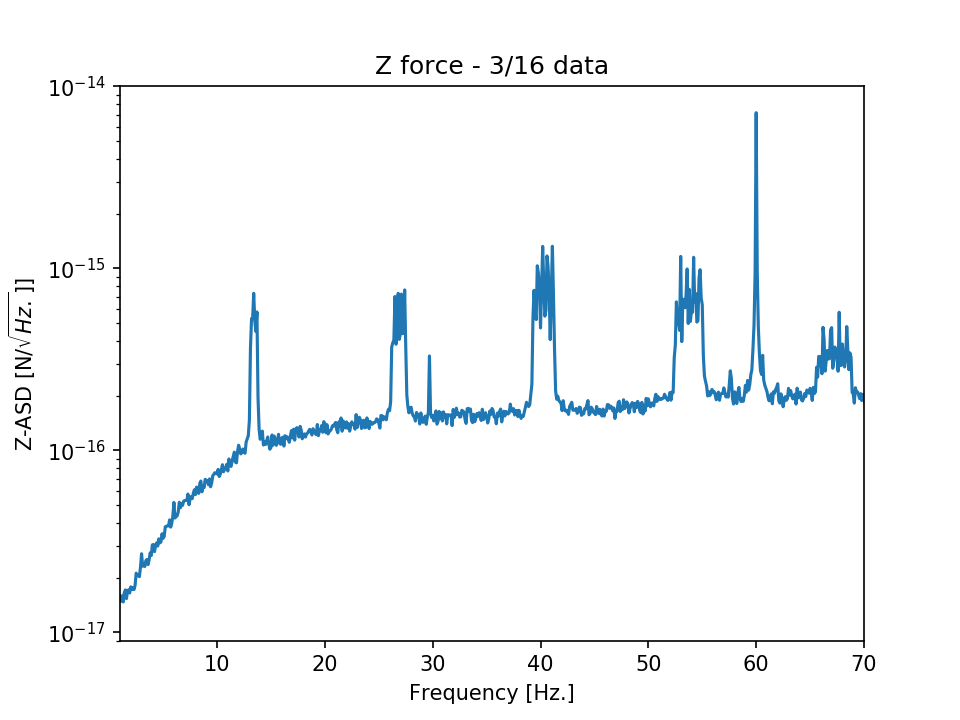

In [202]:
_,ax = plt.subplots()
# tf_freq = np.interp(freq, gfw.tf_freq, gfw.tf_ffts[2])
ax.semilogy(freq, np.sqrt(fftz1)*z_scale)
_ = ax.set(xlim=(1,70), ylim=(9e-18,1e-14), ylabel=r'Z-ASD [N/$\sqrt{Hz.}]$]', xlabel='Frequency [Hz.]', title=r'Z force - 3/16 data')
# print(np.sqrt(np.sqrt(fftz1[freq==36])*z_scale/np.sqrt(10)))

In [239]:
bb = load_dir(dirname='/data/new_trap/20200316/Bead1/Shaking/Shaking368/', 
                         file_prefix='Shaking0', start_file=0, max_file=1)[0]
from likelihood_calculator import auxiliary_functions as aux
cant_pos_x = np.mean(bb.cant_pos[0]) 
x_focous = 386.23
print('distance: ', x_focous-aux.voltage_to_position(cant_pos_x)-7.6/2+1)

No laser power data
100  files in folder
1  files loaded
distance:  15.289100406766078


### 3/20/2020

In [6]:
bdf_discharge = load_dir(dirname='/data/new_trap/20200320/Bead1/Discharge/New_Discharge/',
                         start_file=0, max_file=1000)

No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
15  files in folder
15  files loaded


In [75]:
bdf_z = bdf_discharge[:5]
bdf_x = bdf_discharge[5:10]
bdf_y = bdf_discharge[10:]

freq = bdf_z[0].psd2('z')[0]
z_scale = bdf_z[0].psd2('z')[1][freq==71]
for bb in bdf_z:
    z_scale += bb.psd2('z')[1][freq==71]
z_scale /= len(bdf_z)

x_scale = bdf_x[0].psd2('x')[1][freq==71]
for bb in bdf_x:
    x_scale += bb.psd2('x')[1][freq==71]
x_scale /= len(bdf_x)

y_scale = bdf_y[0].psd2('y')[1][freq==71]
for bb in bdf_y:
    y_scale += bb.psd2('y')[1][freq==71]
y_scale /= len(bdf_y)

charges = 7
force = charges * 1.6e-19 * 20 / 8.6e-3 * 0.63 * np.sqrt(10) # in Newtons/sqrt(Hz)
z_scale = force/np.sqrt(z_scale)
x_scale = force/np.sqrt(x_scale)
y_scale = force/np.sqrt(y_scale)

In [101]:
## 100 files of shaking data for nose floor
data_bdfs = load_dir(dirname='/data/new_trap/20200320/Bead1/Shaking/Shaking378/',
                         file_prefix='Shaking3', start_file=8000, max_file=1000)

# 100 files of shaking data for nose floor
# data_bdfs = load_dir(dirname='/data/new_trap/20200518/Bead2/Shaking/Shaking375/',
#                          file_prefix='Shaking375_3_', start_file=0, max_file=1000)
freq = data_bdfs[0].psd2('x')[0]
fftx4 = data_bdfs[0].psd2('x')[1]
ffty4 = data_bdfs[0].psd2('y')[1]
fftz4 = data_bdfs[0].psd2('z')[1]
for i in range(1,1000):
    fftx4 += data_bdfs[i].psd2('x')[1]
    fftz4 += data_bdfs[i].psd2('z')[1]
    ffty4 += data_bdfs[i].psd2('y')[1]
fftx4/=1000
ffty4/=1000
fftz4/=1000

6905  files in folder
1000  files loaded


In [83]:
fftx_Wilson2 = fftx4
fftz_Wilson2 = fftz4

In [28]:
np.max(data_bdfs[0].cant_pos[1])-np.min(data_bdfs[0].cant_pos[1])

0.0006846464252348028

In [102]:
# fftz3 = fftz1
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].semilogy(freq, np.sqrt(fftx_Wilson)*x_scale, label='Wilson 378-3')
ax[0].semilogy(freq, np.sqrt(fftx_Wilson2)*x_scale, label='Wilson 378-3')
ax[0].legend()
ax[1].semilogy(freq, np.sqrt(fftz_Wilson)*z_scale, label='Wilson 378-3')
ax[1].semilogy(freq, np.sqrt(fftz_Wilson2)*z_scale, label='Wilson 378-3')
ax[1].semilogy(freq, np.sqrt(fftz4)*z_scale, label='Wilson NoShaking')
ax[1].legend()
ax[0].set(xlim=(1,70), ylim=(9e-18,1e-14), xlabel='Frequency [Hz.]', ylabel=r'ASD [N/$\sqrt{Hz}$]', title='X force')
_ = ax[1].set(xlim=(1,70), ylim=(9e-18,1e-14), xlabel='Frequency [Hz.]', title=r'Z force')
print(np.sqrt(fftx_Wilson[freq==36])*x_scale/np.sqrt(10), np.sqrt(fftz_Wilson[freq==36])*z_scale/np.sqrt(10))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[1.21941716e-15] [3.38043053e-17]


In [75]:
freq[1]

0.0

In [81]:
_,ax = plt.subplots(figsize=(9,4))
ax.semilogy(freq, np.sqrt(fftz_Wilson)*z_scale, label='Wilson 378-3')
# ax[1].semilogy(freq, np.sqrt(fftz3)*z_scale, alpha=0.5)
# ax.semilogy(freq, np.sqrt(fftz2)*z_scale/1.05, alpha=0.6, label='Shaking374_12')
# ax.semilogy(freq, np.sqrt(fftz3)*z_scale/1.05, alpha=0.6, label='Shaking375_7')
# ax.semilogy(freq, np.abs(fftz4)*z_scale2, alpha=0.6, label='Shaking375_3 - NoShaking')

ax.legend()
_ = ax.set(xlim=(15,50), ylim=(6e-17,2e-16), xlabel='Frequency [Hz.]', title=r'Z force')
ax.grid()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [218]:
np.sqrt(fftz1[freq==36])*z_scale/np.sqrt(10)-np.sqrt(fftz1[freq==34])*z_scale/np.sqrt(10)

array([3.04116047e-18])

In [9]:
# bb = load_dir(dirname='/data/new_trap/20200320/Bead1/Shaking/Shaking378/',
#                          file_prefix='Shaking3', start_file=0, max_file=1000)[0]
# from likelihood_calculator import auxiliary_functions as aux
cant_pos_x = np.mean(bb.cant_pos[0]) 
cant_pos_y = np.mean(bb.cant_pos[1]) 
x_focous = 392.4 
print('distance: ', x_focous-aux.voltage_to_position(cant_pos_x)-7.6/2+1)
print('y-offset: ', 437.3-9.5*25-aux.voltage_to_position(cant_pos_y), 'y-pos: ', aux.voltage_to_position(cant_pos_y))

distance:  11.39110158645111
y-offset:  4.884549098128645 y-pos:  194.91545090187137


### Grid data

In [8]:
distances = [372,374,376]
ffts_x = []
ffts_y = []
ffts_z = []
for dist in distances:
    data_bdfs = load_dir(dirname=r'/data/new_trap/20200320/Bead1/Shaking/Shaking2_20200403/Small_Grid/', 
                         file_prefix='Shaking'+str(dist)+'_0')
    freq = data_bdfs[0].psd2('x')[0]
    fftx1 = data_bdfs[0].psd2('x')[1]
    ffty1 = data_bdfs[0].psd2('y')[1]
    fftz1 = data_bdfs[0].psd2('z')[1]
    for i in range(1,100):
        fftx1 += data_bdfs[i].psd2('x')[1]
        fftz1 += data_bdfs[i].psd2('z')[1]
        ffty1 += data_bdfs[i].psd2('y')[1]
    ffts_x.append(fftx1/100)
    ffts_y.append(ffty1/100)
    ffts_z.append(fftz1/100)

100  files in folder
100  files loaded
100  files in folder
100  files loaded
100  files in folder
100  files loaded


In [9]:
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharex=True, sharey=True)
[ax[1].semilogy(freq, np.sqrt(fft_)*z_scale, label=r'${:0.1f}\,\mu m$'.format(392.4-dis-7.6/2+1)) for fft_,dis in zip(ffts_z, distances)]
[ax[0].semilogy(freq, np.sqrt(fft_)*x_scale, label=r'${:0.1f}\,\mu m$'.format(392.4-dis-7.6/2+1)) for fft_,dis in zip(ffts_x, distances)]
ax[0].legend()
_ = ax[0].set(xlim=(1,70), ylim=(9e-18,1e-14), xlabel='Frequency [Hz.]', ylabel=r'Force ASD [N/$\sqrt{Hz}$]', title='X (100 files)')
_ = ax[1].set(xlim=(1,70), ylim=(9e-18,1e-14), xlabel='Frequency [Hz.]', title='Z (100 files)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [253]:
[np.sqrt(ffts_[freq==36])*x_scale/np.sqrt(10) for ffts_ in ffts_x]

[array([1.30945649e-16]), array([3.8078135e-16]), array([1.06957532e-15])]

### 5/18/2020 - de Broglie

In [19]:
bdf_discharge2 = load_dir(dirname='/data/new_trap/20200518/Bead2/Discharge/Discharge0518/', 
                          start_file=226, max_file=15, file_prefix='Discharge')

241  files in folder
15  files loaded


In [20]:
bdf_z = bdf_discharge2[:5]
bdf_x = bdf_discharge2[10:]
bdf_y = bdf_discharge2[5:10]

freq = bdf_z[0].psd2('z')[0]
z_scale2 = bdf_z[0].psd2('z')[1][freq==71]
for bb in bdf_z:
    z_scale2 += bb.psd2('z')[1][freq==71]
z_scale2 /= len(bdf_z)

x_scale2 = bdf_x[0].psd2('x')[1][freq==71]
for bb in bdf_x:
    x_scale2 += bb.psd2('x')[1][freq==71]
x_scale2 /= len(bdf_x)

y_scale2 = bdf_y[0].psd2('y')[1][freq==71]
for bb in bdf_y:
    y_scale2 += bb.psd2('y')[1][freq==71]
y_scale2 /= len(bdf_y)

charges = 20
force = charges * 1.6e-19 * 20 / 8.6e-3 * 0.63 * np.sqrt(10) # in Newtons/sqrt(Hz)
z_scale2 = force/np.sqrt(z_scale2)
x_scale2 = force/np.sqrt(x_scale2)
y_scale2 = force/np.sqrt(y_scale2)

In [21]:
# 100 files of shaking data for nose floor
data_bdfs = load_dir(dirname='/data/new_trap/20200518/Bead2/Shaking/Shaking375/',
                         file_prefix='Shaking375_7_', start_file=0, max_file=1000)
freq = data_bdfs[0].psd2('x')[0]
fftx4 = data_bdfs[0].psd2('x')[1]
ffty4 = data_bdfs[0].psd2('y')[1]
fftz4 = data_bdfs[0].psd2('z')[1]
for i in range(1,1000):
    fftx4 += data_bdfs[i].psd2('x')[1]
    fftz4 += data_bdfs[i].psd2('z')[1]
    ffty4 += data_bdfs[i].psd2('y')[1]
fftx4/=1000
ffty4/=1000
fftz4/=1000

1000  files in folder
1000  files loaded


<IPython.core.display.Javascript object>


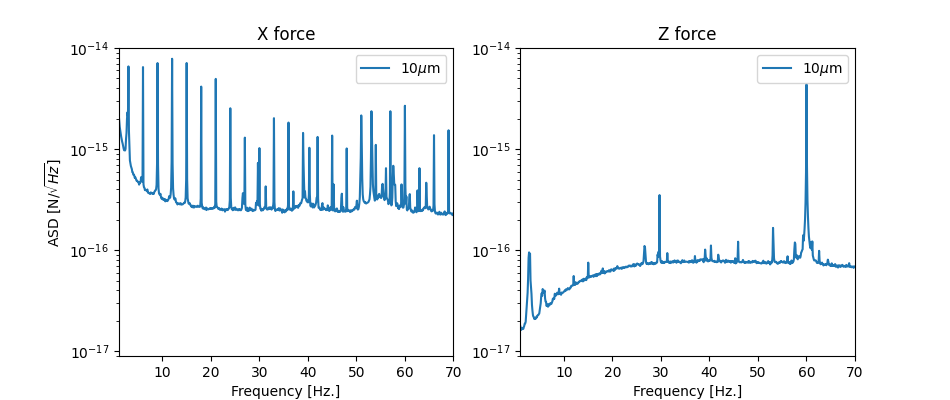

[5.78968493e-16] [6.60949347e-17]


In [23]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].semilogy(freq, np.sqrt(fftx4)*x_scale, label=r'10$\mu$m')
# ax[0].semilogy(freq, np.sqrt(fftx1)*x_scale1, label=r'5$\mu$m', alpha=0.5)
ax[0].legend()
ax[1].semilogy(freq, np.sqrt(fftz4)*z_scale, label=r'10$\mu$m')
# ax[1].semilogy(freq, np.sqrt(fftz1)*z_scale1, label=r'5$\mu$m', alpha=0.5)
ax[1].legend()
ax[0].set(xlim=(1,70), ylim=(9e-18,1e-14), xlabel='Frequency [Hz.]', ylabel=r'ASD [N/$\sqrt{Hz}$]', title='X force')
_ = ax[1].set(xlim=(1,70), ylim=(9e-18,1e-14), xlabel='Frequency [Hz.]', title=r'Z force')
print(np.sqrt(fftx4[freq==36])*x_scale/np.sqrt(10), np.sqrt(fftz4[freq==18])*z_scale)
# print(np.sqrt(fftx1[freq==36])*x_scale1/np.sqrt(10), np.sqrt(fftz1[freq==18])*z_scale1)

### 6/14/2020 - Chadwick

In [6]:
bdf_discharge = load_dir(dirname='/data/new_trap/20200614/Bead1/Discharge/Discharge3/', start_file=80, max_file=15)

305  files in folder
15  files loaded


In [7]:
bdf_z = bdf_discharge[10:]
bdf_x = bdf_discharge[:5]
bdf_y = bdf_discharge[5:10]

freq = bdf_z[0].psd2('z')[0]
z_scale1 = bdf_z[0].psd2('z')[1][freq==71]
for bb in bdf_z:
    z_scale1 += bb.psd2('z')[1][freq==71]
z_scale1 /= len(bdf_z)

x_scale1 = bdf_x[0].psd2('x')[1][freq==71]
for bb in bdf_x:
    x_scale1 += bb.psd2('x')[1][freq==71]
x_scale1 /= len(bdf_x)

y_scale1 = bdf_y[0].psd2('y')[1][freq==71]
for bb in bdf_y:
    y_scale1 += bb.psd2('y')[1][freq==71]
y_scale1 /= len(bdf_y)

charges = 3
force = charges * 1.6e-19 * 20 / 8.6e-3 * 0.63 * np.sqrt(10) # in Newtons/sqrt(Hz)
z_scale1 = force/np.sqrt(z_scale1)

fname = r'/data/new_trap/20200614/Bead1/TransFunc/TransFunc_X_2_7e5_250s_1Hz.h5'
tf_x = BeadDataFile.BeadDataFile(fname)
fname = r'/data/new_trap/20200614/Bead1/TransFunc/TransFunc_Y_2_7e5_250s_1Hz.h5'
tf_y = BeadDataFile.BeadDataFile(fname)
fname = r'/data/new_trap/20200614/Bead1/TransFunc/TransFunc_Z_2_7e5_250s_1Hz.h5'
tf_z = BeadDataFile.BeadDataFile(fname)
freq1 = tf_x.psd2('x')[0]
x_scale_71 = 1/np.sqrt(tf_x.psd2('x')[1][freq1==70])
y_scale_71 = 1/np.sqrt(tf_y.psd2('y')[1][freq1==70])
z_scale_71 = 1/np.sqrt(tf_z.psd2('z')[1][freq1==70])

x_scale1 = x_scale_71*(z_scale1/z_scale_71)

No height data
No cantilever data
Error loading spinning data
No laser power data
No height data
No cantilever data
Error loading spinning data
No laser power data
No height data
No cantilever data
Error loading spinning data
No laser power data


In [8]:
## 100 files of shaking data for nose floor
data_bdfs = load_dir(dirname='/data/new_trap/20200614/Bead1/Shaking/Shaking367/',
                         file_prefix='SpinShaking4', start_file=0, max_file=1000)
freq = data_bdfs[0].psd2('x')[0]
fftx1 = data_bdfs[0].psd2('x')[1]
ffty1 = data_bdfs[0].psd2('y')[1]

fftz1 = data_bdfs[0].psd2('z')[1]
for i in range(1,1000):
    fftx1 += data_bdfs[i].psd2('x')[1]
    fftz1 += data_bdfs[i].psd2('z')[1]
    ffty1 += data_bdfs[i].psd2('y')[1]
fftx1/=1000
ffty1/=1000
fftz1/=1000

4000  files in folder
1000  files loaded


In [9]:
fftx_spin = fftx1
fftz_spin = fftz1

<IPython.core.display.Javascript object>


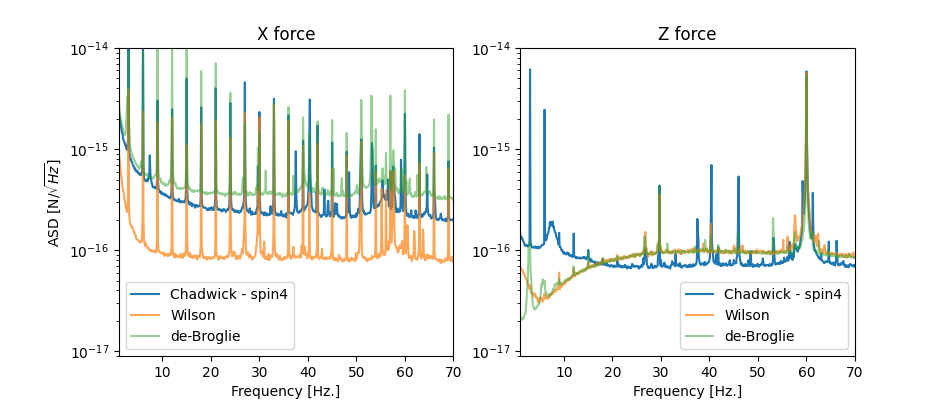

X-backgrounds [N]: [6.82248588e-16]
Z-noisefloor [N/sqrt(Hz.)]: [6.82389595e-17]
X-backgrounds [N]: [1.30529909e-18]


In [23]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
# tf_freq = np.interp(freq, gfw.tf_freq, gfw.tf_ffts[2])
ax[0].semilogy(freq, np.sqrt(fftx_spin)*x_scale1, label='Chadwick - spin4')
ax[0].semilogy(freq, np.sqrt(fftx_Wilson)*x_scale, label=r'Wilson', alpha=0.7)
ax[0].semilogy(freq, np.sqrt(fftx4)*x_scale2, label=r'de-Broglie', alpha=0.5)
ax[0].legend()
ax[1].semilogy(freq, np.sqrt(fftz_spin)*z_scale1, label='Chadwick - spin4')
ax[1].semilogy(freq, np.sqrt(fftz_Wilson)*z_scale, label='Wilson', alpha=0.7)
ax[1].semilogy(freq, np.sqrt(fftz4)*z_scale2, label='de-Broglie', alpha=0.5)
ax[1].legend()
ax[0].set(xlim=(1,70), ylim=(9e-18,1e-14), xlabel='Frequency [Hz.]', ylabel=r'ASD [N/$\sqrt{Hz}$]', title='X force')
_ = ax[1].set(xlim=(1,70), ylim=(9e-18,1e-14), xlabel='Frequency [Hz.]', title=r'Z force')
print('X-backgrounds [N]:', np.sqrt(fftx_spin[freq==36])*x_scale1/np.sqrt(10))
print('Z-noisefloor [N/sqrt(Hz.)]:', np.sqrt(fftz_spin[freq==34])*z_scale1)
print('X-backgrounds [N]:', (np.sqrt(fftz_spin[freq==36])*z_scale1-np.sqrt(fftz_spin[freq==34])*z_scale1)/np.sqrt(10))

<IPython.core.display.Javascript object>


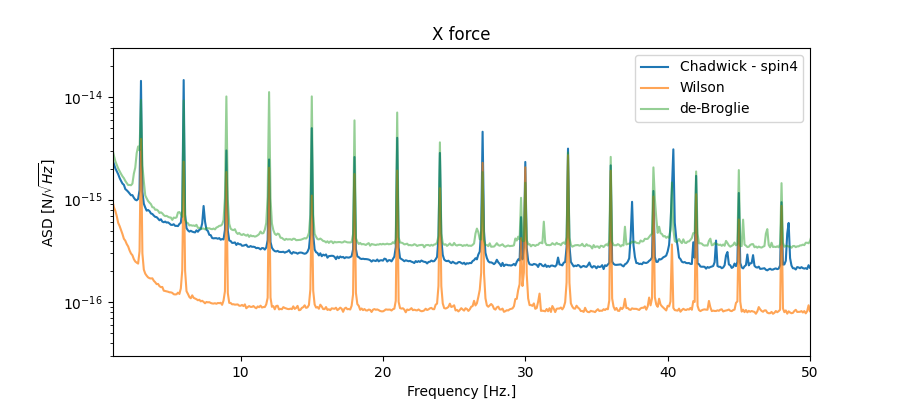

[(3e-17, 3e-14),
 Text(0, 0.5, 'ASD [N/$\\sqrt{Hz}$]'),
 (1.0, 50.0),
 Text(0.5, 0, 'Frequency [Hz.]'),
 Text(0.5, 1.0, 'X force')]

In [27]:
_,ax = plt.subplots(figsize=(9,4))
ax.semilogy(freq, np.sqrt(fftx_spin)*x_scale1, label='Chadwick - spin4')
ax.semilogy(freq, np.sqrt(fftx_Wilson)*x_scale, label=r'Wilson', alpha=0.7)
ax.semilogy(freq, np.sqrt(fftx4)*x_scale2, label=r'de-Broglie', alpha=0.5)
ax.legend()
ax.set(xlim=(1,50), ylim=(3e-17,3e-14), xlabel='Frequency [Hz.]', ylabel=r'ASD [N/$\sqrt{Hz}$]', title='X force')

### 09/24/2020 - Blackett

In [10]:
bdf_discharge = load_dir(dirname='/data/new_trap/20200924/Bead1/Discharge/Recharge_20200925/', start_file=0)

70  files in folder
70  files loaded


In [11]:
bdf_z = bdf_discharge[40:45]
bdf_x = bdf_discharge[30:35]

freq = bdf_z[0].psd2('z')[0]
z_scale1 = bdf_z[0].psd2('z')[1][freq==71]
for bb in bdf_z:
    z_scale1 += bb.psd2('z')[1][freq==71]
z_scale1 /= len(bdf_z)

x_scale1 = bdf_x[0].psd2('x')[1][freq==71]
for bb in bdf_x:
    x_scale1 += bb.psd2('x')[1][freq==71]
x_scale1 /= len(bdf_x)

charges = 3
force = charges * 1.6e-19 * 20 / 8.6e-3 * 0.63 * np.sqrt(10) # in Newtons/sqrt(Hz)
z_scale1 = force/np.sqrt(z_scale1)
x_scale1 = force/np.sqrt(x_scale1)

In [12]:
## 100 files of shaking data for nose floor
num_files = 100
data_bdfs = load_dir(dirname='/data/new_trap/20200924/Bead1/Shaking/Shaking345/',
                         file_prefix='NoSpinShaking0_', start_file=0, max_file=num_files)
freq = data_bdfs[0].psd2('x')[0]
fftx = data_bdfs[0].psd2('x')[1]
ffty = data_bdfs[0].psd2('y')[1]

fftz = data_bdfs[0].psd2('z')[1]
for i in range(1,num_files):
    fftx += data_bdfs[i].psd2('x')[1]
    fftz += data_bdfs[i].psd2('z')[1]
    ffty += data_bdfs[i].psd2('y')[1]
fftx/=num_files
ffty/=num_files
fftz/=num_files

1000  files in folder
100  files loaded


In [21]:
_,ax = plt.subplots(1,2,figsize=(9.1,4), sharex=True)
# tf_freq = np.interp(freq, gfw.tf_freq, gfw.tf_ffts[2])
ax[0].semilogy(freq, np.sqrt(fftx)*x_scale1, label='Blackett')
ax[1].semilogy(freq, np.sqrt(fftz)*z_scale1, label='Blackett')
# [a.legend() for a in ax]
ax[0].set(xlim=(1,50), ylim=(9e-18,1e-14), xlabel='Frequency [Hz.]', ylabel=r'ASD [N/$\sqrt{Hz}$]', title='X force')
_ = ax[1].set(xlim=(1,50), ylim=(9e-18,1e-14), xlabel='Frequency [Hz.]', title=r'Z force')
# print(np.sqrt(fftx[freq==36])*x_scale1/np.sqrt(10))

[ax[1].semilogy(freq, np.sqrt(fft_)*z_scale, label=r'${:0.1f}\,\mu m$'.format(392.4-dis-7.6/2+1), alpha=0.4) for fft_,dis in zip(ffts_z, distances)]
[ax[0].semilogy(freq, np.sqrt(fft_)*x_scale, label=r'${:0.1f}\,\mu m$'.format(392.4-dis-7.6/2+1), alpha=0.4) for fft_,dis in zip(ffts_x, distances)]
ax[0].legend()
_ = ax[0].set(xlim=(1,70), ylim=(9e-18,1e-14), xlabel='Frequency [Hz.]', ylabel=r'Force ASD [N/$\sqrt{Hz}$]', title='X (100 files)')
_ = ax[1].set(xlim=(1,70), ylim=(9e-18,1e-14), xlabel='Frequency [Hz.]', title='Z (100 files)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [20]:
_,ax = plt.subplots(figsize=(9,4))
ax.semilogy(freq, np.sqrt(fftx)*x_scale1, label='Blackett')
[ax.semilogy(freq, np.sqrt(fft_)*x_scale, label=r'${:0.1f}\,\mu m$'.format(392.4-dis-7.6/2+1), alpha=0.4) for fft_,dis in zip(ffts_x[-2:], distances[-2:])]

ax.legend()
ax.set(xlim=(1,50), ylim=(3e-17,3e-14), xlabel='Frequency [Hz.]', ylabel=r'ASD [N/$\sqrt{Hz}$]', title='X force')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[(1.0, 50.0),
 (3e-17, 3e-14),
 Text(0.5, 0, 'Frequency [Hz.]'),
 Text(0, 0.5, 'ASD [N/$\\sqrt{Hz}$]'),
 Text(0.5, 1.0, 'X force')]